In [3]:
# 
import json
import cv2
import requests
import uuid
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.ocr.v20181119 import ocr_client, models
from tencentcloud.ocr.v20181119 import models as ocr_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [39]:
"""

通用印刷体识别（高精度版）
https://console.cloud.tencent.com/api
/explorer?Product=ocr&Version=2018-11-19&Action=GeneralAccurateOCR&SignVersion=
"""


try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ocr.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ocr_client.OcrClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/sx5.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = ocr_models.GeneralHandwritingOCRRequest()

    params = {
        "ImageBase64": str(img,encoding="utf-8"),
#         "ImageUrl": "",
        "EnableWordPolygon": True ,
        "Scene": "only_hw", # 场景字段，默认不用填写。可选值:only_hw 表示只输出手写体识别结果，过滤印刷体。

        

    }
    req.from_json_string(json.dumps(params))

    resp = client.GeneralHandwritingOCR(req).to_json_string() 
     
    resp=json.loads(resp)
    print(resp)  

except TencentCloudSDKException as err: 
    print(err) 



{'TextDetections': [{'DetectedText': '用户栖枝玄鸟', 'Confidence': 92, 'Polygon': [{'X': 161, 'Y': 75}, {'X': 427, 'Y': 75}, {'X': 427, 'Y': 122}, {'X': 161, 'Y': 122}], 'AdvancedInfo': '{"Parag":{"ParagNo":1}}', 'WordPolygon': [{'LeftTop': {'X': 155, 'Y': 75}, 'RightTop': {'X': 184, 'Y': 75}, 'RightBottom': {'X': 184, 'Y': 122}, 'LeftBottom': {'X': 155, 'Y': 122}}, {'LeftTop': {'X': 184, 'Y': 75}, 'RightTop': {'X': 208, 'Y': 75}, 'RightBottom': {'X': 208, 'Y': 122}, 'LeftBottom': {'X': 184, 'Y': 122}}, {'LeftTop': {'X': 208, 'Y': 75}, 'RightTop': {'X': 232, 'Y': 75}, 'RightBottom': {'X': 232, 'Y': 122}, 'LeftBottom': {'X': 208, 'Y': 122}}, {'LeftTop': {'X': 232, 'Y': 75}, 'RightTop': {'X': 280, 'Y': 75}, 'RightBottom': {'X': 280, 'Y': 122}, 'LeftBottom': {'X': 232, 'Y': 122}}, {'LeftTop': {'X': 280, 'Y': 75}, 'RightTop': {'X': 328, 'Y': 75}, 'RightBottom': {'X': 328, 'Y': 122}, 'LeftBottom': {'X': 280, 'Y': 122}}, {'LeftTop': {'X': 328, 'Y': 75}, 'RightTop': {'X': 364, 'Y': 75}, 'RightBotto

In [34]:
"""
Scene	否	String	场景字段，默认不用填写。
可选值:only_hw 表示只输出手写体识别结果，过滤印刷体。
EnableWordPolygon	否	Boolean	是否开启单字的四点定位坐标输出，默认值为false。
"""

'\nScene\t否\tString\t场景字段，默认不用填写。\n可选值:only_hw 表示只输出手写体识别结果，过滤印刷体。\nEnableWordPolygon\t否\tBoolean\t是否开启单字的四点定位坐标输出，默认值为false。\n'

In [40]:
resp["TextDetections"]

[{'DetectedText': '用户栖枝玄鸟',
  'Confidence': 92,
  'Polygon': [{'X': 161, 'Y': 75},
   {'X': 427, 'Y': 75},
   {'X': 427, 'Y': 122},
   {'X': 161, 'Y': 122}],
  'AdvancedInfo': '{"Parag":{"ParagNo":1}}',
  'WordPolygon': [{'LeftTop': {'X': 155, 'Y': 75},
    'RightTop': {'X': 184, 'Y': 75},
    'RightBottom': {'X': 184, 'Y': 122},
    'LeftBottom': {'X': 155, 'Y': 122}},
   {'LeftTop': {'X': 184, 'Y': 75},
    'RightTop': {'X': 208, 'Y': 75},
    'RightBottom': {'X': 208, 'Y': 122},
    'LeftBottom': {'X': 184, 'Y': 122}},
   {'LeftTop': {'X': 208, 'Y': 75},
    'RightTop': {'X': 232, 'Y': 75},
    'RightBottom': {'X': 232, 'Y': 122},
    'LeftBottom': {'X': 208, 'Y': 122}},
   {'LeftTop': {'X': 232, 'Y': 75},
    'RightTop': {'X': 280, 'Y': 75},
    'RightBottom': {'X': 280, 'Y': 122},
    'LeftBottom': {'X': 232, 'Y': 122}},
   {'LeftTop': {'X': 280, 'Y': 75},
    'RightTop': {'X': 328, 'Y': 75},
    'RightBottom': {'X': 328, 'Y': 122},
    'LeftBottom': {'X': 280, 'Y': 122}},
   {'Le

In [41]:
DetectedTextList=[]
PolygonList=[]
for content in resp["TextDetections"]:
    DetectedTextList.append(content["DetectedText"])
    PolygonList.append(content['Polygon'])
    
'\n'.join(DetectedTextList)

'用户栖枝玄鸟\n你一定要努力，但干万别着急\n总要为梦想疯狂一次\n你读你的励志书，我看我的“毁志书”\n你认识多少人和你有多少朋友一点关系都没有\n被穷养大的孩子，最怕问父母要钱\n胡适曾经写过另一版本的《西游记》结局\n如何用王家卫的语气失恋\n林妹妹的万贯家财哪儿去了?'

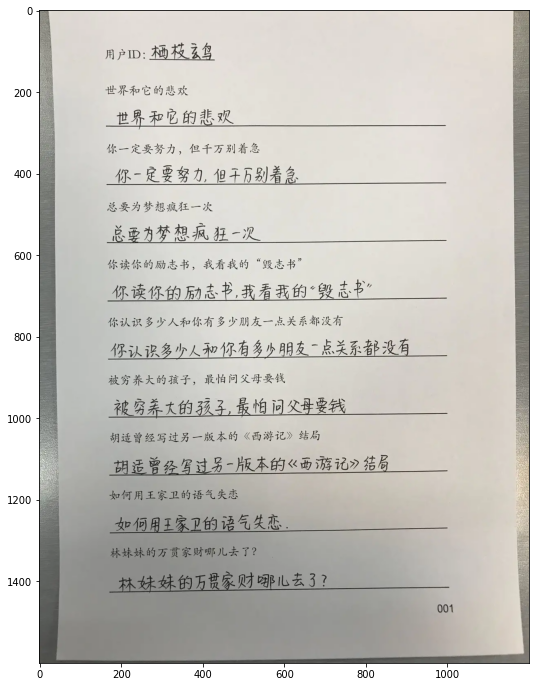

In [42]:
plt.figure(figsize=(12,12))
img=plt.imread(img_path)
plt.imshow(img)

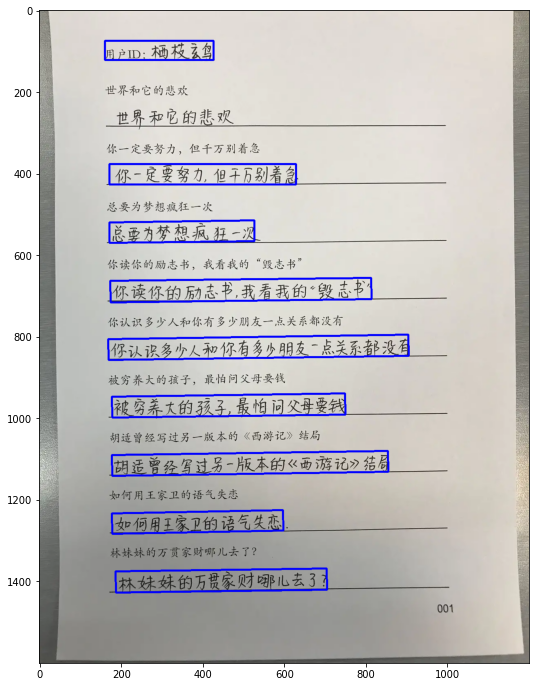

In [43]:
plt.figure(figsize=(12,12))
res=plt.imread(img_path)
for pts in PolygonList:
#     print(pts)
    points=np.array([[pt["X"],pt["Y"]] for pt in pts],np.int32)
    points.reshape((-1,1,2))
    res=cv2.polylines(img=res, pts=[points], isClosed=True, color=(0,0,255), thickness=3)
plt.imshow(res)